In [1]:
import sys  
sys.path.insert(0, './src')

import src.simulation
from src import simulation 
import numpy as np

import matplotlib.pyplot as plt

from src.simulation import Simulation, default_sim_options
from src.environments import NetworkConsensusEnv


### Run Network Consensus MARL Simulation

In [2]:
custom_sim_options = {
    'num_episodes': 300,
    'num_runs': 10
}

custom_agent_options = {
    'gamma': 0.999,
    'epsilon':0.3,
    'alpha': 0.03,
    'decaying_epsilon': True,
    'epsilon_decay': 0.9996,
    'learning_rate_decay': 1.0
}

custom_env_options = {
    'sqrt_num_agents':3,
    'num_unreliable_agents': 4
}

env = NetworkConsensusEnv(custom_env_options, candidate_values=np.arange(0, 2))
network_sim = Simulation(custom_sim_options, agent_options=custom_agent_options, env=env)

sim_data = network_sim.run_simulation()

performing run: 0


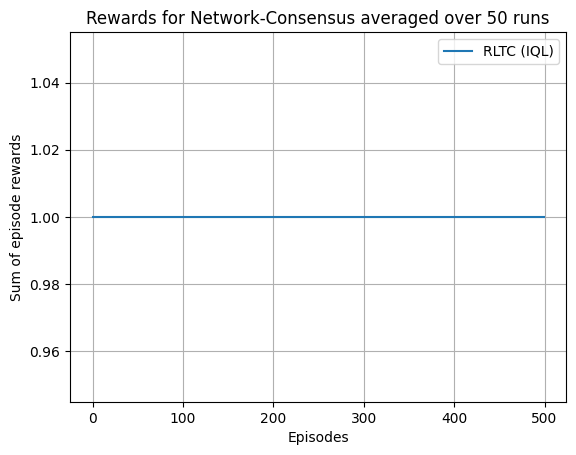

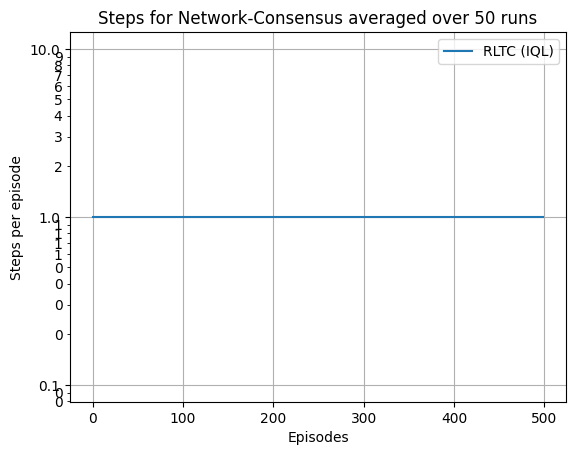

In [ ]:


# plotting
x = np.arange(0, custom_sim_options['num_episodes'])
# x = np.arange(0, 20)

fig, ax = plt.subplots()
ax.set_title(f"Rewards for Network-Consensus averaged over {custom_sim_options['num_runs']} runs")
ax.set_xlabel('Episodes')
ax.set_ylabel('Sum of episode rewards')
# ax.set_ylim(-1000, 0)
ax.plot(x, sim_data[0])
# ax.plot(x, act_crit_acrobot_data[0])
# ax.axhline(y=-100, color='r', linestyle='--')
ax.legend(['RLTC (IQL)'])
plt.grid()
plt.show()

from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
ax.set_title(f"Steps for Network-Consensus averaged over {custom_sim_options['num_runs']} runs")
ax.set_xlabel('Episodes')
ax.set_ylabel('Steps per episode')
# ax.set_ylim(100, 1000)
ax.set_yscale("log") 
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_minor_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
ax.plot(x, sim_data[1])
# ax.plot(x, act_crit_acrobot_data[2])
# ax.axhline(y=100, color='r', linestyle='--')
# ax.legend(["n = 1", "n = 4", "n = 8", "n = 16"])
ax.legend(['RLTC (IQL)'])
plt.grid()
plt.show()